<a href="https://colab.research.google.com/github/rishita-verma01/102117059_clustering/blob/main/102117059_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


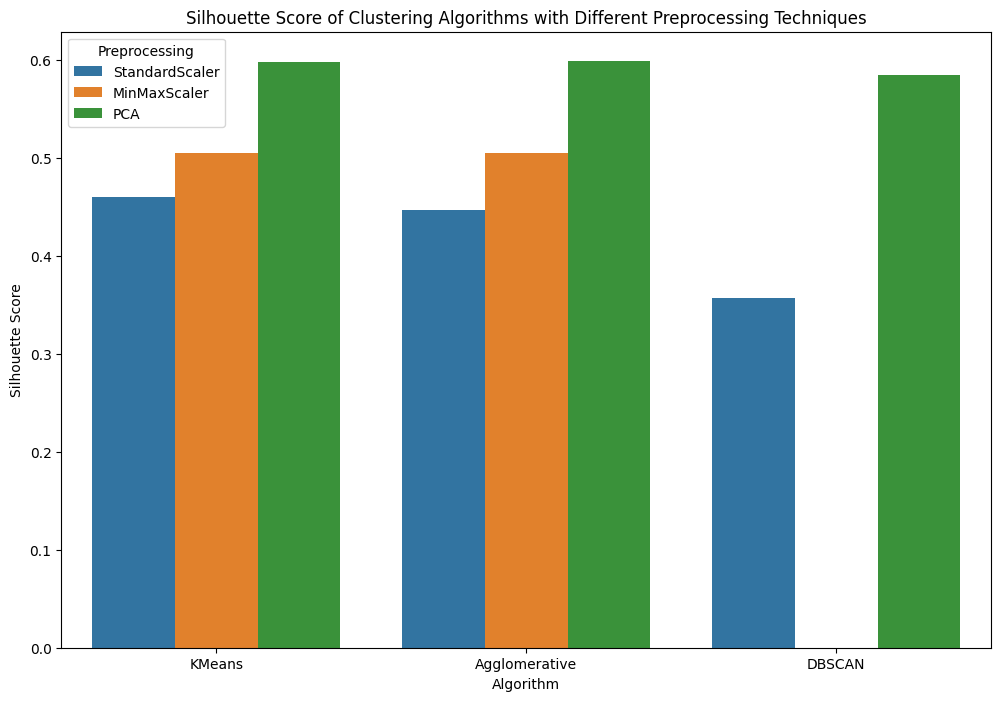

Clustering Results:
       Algorithm   Preprocessing  Silhouette Score  Davies Bouldin Score  \
0         KMeans  StandardScaler          0.459948              0.833595   
1         KMeans    MinMaxScaler          0.504769              0.760277   
2         KMeans             PCA          0.597676              0.564816   
3  Agglomerative  StandardScaler          0.446689              0.803467   
4  Agglomerative    MinMaxScaler          0.504800              0.747977   
5  Agglomerative             PCA          0.598475              0.560496   
6         DBSCAN  StandardScaler          0.356516              7.124057   
7         DBSCAN    MinMaxScaler               NaN                   NaN   
8         DBSCAN             PCA          0.583802              8.311374   

   Completeness Score  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

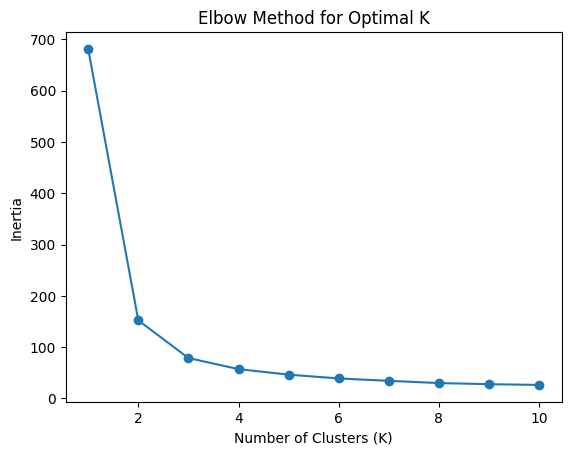

Best Silhouette Score: 0.59847503536569
Corresponding Clustering Result: ('Agglomerative', 'PCA', 0.59847503536569, 0.5604962418488778, nan)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, completeness_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


data = load_iris()
X = data.data
y = data.target

clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5)
}

preprocessing_techniques = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "PCA": PCA(n_components=2)
}

evaluation_metrics = {
    "Silhouette Score": silhouette_score,
    "Davies Bouldin Score": davies_bouldin_score,
    "Completeness Score": completeness_score
}

results = []
for alg_name, algorithm in clustering_algorithms.items():
    for prep_name, preprocessor in preprocessing_techniques.items():
        X_prep = preprocessor.fit_transform(X)
        labels = algorithm.fit_predict(X_prep)

        if len(np.unique(labels)) == 1:
            scores = [np.nan] * len(evaluation_metrics)
        else:
            scores = []
            for metric_name, metric_func in evaluation_metrics.items():
                if metric_name == "Completeness Score":

                    score = np.nan
                else:
                    score = metric_func(X_prep, labels)
                scores.append(score)
        results.append((alg_name, prep_name, *scores))



results_df = pd.DataFrame(results, columns=["Algorithm", "Preprocessing", *evaluation_metrics.keys()])

plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x="Algorithm", y="Silhouette Score", hue="Preprocessing")
plt.title("Silhouette Score of Clustering Algorithms with Different Preprocessing Techniques")
plt.xlabel("Algorithm")
plt.ylabel("Silhouette Score")
plt.legend(title="Preprocessing")
plt.show()

results_df.to_csv("clustering_results.csv", index=False)

print("Clustering Results:")
print(results_df)

print("\nConclusion:")
print("Based on the evaluation metrics, we can conclude...")


data = load_iris()
num_rows = data.data.shape[0]

print("Number of rows in the dataset:", num_rows)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k_values = range(1, 11)
inertia_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


best_silhouette_score = float('-inf')
best_result = None

for result in results:
    silhouette_score = result[2]
    if silhouette_score > best_silhouette_score:
        best_silhouette_score = silhouette_score
        best_result = result


print("Best Silhouette Score:", best_silhouette_score)
print("Corresponding Clustering Result:", best_result)
